# Decision Tree

* A supervised learning technique that can be used for discrete and continuous output.
* Visually engaging and easy to interpret.
* Excellent model for someone transitioning into the world of data science.
* Foundational to learning some very powerful techniques.
* Are prone towards high-variance.

<img src="https://i.postimg.cc/mg99cVx5/decision-tree2.png" width="700"/>


## Basic Interpretation

Decision Trees are made up of interconnected nodes, which act as a series of questions / test conditions (e.g., is the passenger male or female?)

* **Rule of thumb #1:** The higher up the tree a variable is, the most important it is
* **Rule of thumb #2:** The more frequently a variable appears, the more important it is

<img src="https://i.postimg.cc/GhF8dtvW/decision-tree.png" width="700"/>

### Training process of a Decision Tree

On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the **fullest purity**.


### ⛔ Where to Stop Splitting

We worked on splitting the data based on features. If we have a huge number of features and we want to use all the features to build the tree, the tree will become too large. That may cause overfitting and long computation time.

To handle this:
1) there is a `max_depth` parameter in the decision tree function of the scikit-learn library. If the max depth parameter is large, the tree will be larger. So, we can choose the depth of the tree.

2) There is another parameter, `max_features`. The name of the parameter says what it does. You can specify the maximum number of features you want to use for your tree.

## 1.Import Libraries and Data

In [55]:
import numpy as np
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_csv("./dataset/loan_data.csv")
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


Here are what the columns represent:
* **`credit.policy`**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* **`purpose`**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

* **`int.rate`**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* **`installment`**: The monthly installments owed by the borrower if the loan is funded.

* **`log.annual.inc`**: The natural log of the self-reported annual income of the borrower.

* **`dti`**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* **`fico`**: The FICO credit score of the borrower.

* **`days.with.cr.line`**: The number of days the borrower has had a credit line.

* **`revol.bal`**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* **`revol.util`**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* **`inq.last.6mths`**: The borrower's number of inquiries by creditors in the last 6 months.

* **`delinq.2yrs`**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* **`pub.rec`**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## 2.Exploratory Data Analysis

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [58]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [59]:
px.histogram(df, x="fico", color = "credit.policy" , 
             barmode="overlay", nbins=50)

* This figure shows that people who have lower FICO score tends to have a credit policy of 0, this means that they do not meet the criteria of borrowing money

* People who have 660 or fewer fico socre do not meet the criteria

In [6]:
px.histogram(df, x="fico", color = "not.fully.paid" , barmode="overlay", nbins=50)

* The figure shows that the majority of people pay these loans

* The loans fully paid or not fully paid has almost the same distribution, but those not fully paid has lower fico scores

In [60]:
px.histogram(df, x="purpose", color = "not.fully.paid" , barmode="group",
             title="The Counts of Loans by Purpose")

In [69]:
bypurposes= df.groupby('purpose')['not.fully.paid'].agg(['sum' , 'count'])
bypurposes


,sum,count
purpose,,
all_other,387,2331
credit_card,146,1262
debt_consolidation,603,3957
educational,69,343
home_improvement,107,629
major_purchase,49,437
small_business,172,619


In [70]:
bypurposes['ratio'] = bypurposes['sum'] / bypurposes['count']
bypurposes  =  bypurposes.sort_values('ratio', ascending=False)

In [71]:
bypurposes

,sum,count,ratio
purpose,,,
small_business,172,619,0.277868
educational,69,343,0.201166
home_improvement,107,629,0.170111
all_other,387,2331,0.166023
debt_consolidation,603,3957,0.152388
credit_card,146,1262,0.115689
major_purchase,49,437,0.112128


In [10]:
px.bar(bypurposes['ratio'])

* Based on countplot of purpose of loan, we can say that debt consolidation is the most popular reason for loan

* Secondly the ratio of fully paid and not fully paid is almost similar across different purposes of loan

In [73]:
px.scatter(df, x="fico", y="int.rate", trendline='ols')

* The figure above shows that the more fico score increase, the lower interest rate people have better credit get and vice versa

In [74]:
px.imshow(df.corr())

## 3. Feature Engineering:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


>**💥 NOTE:**   **get_dummies**(data) -> 'DataFrame' Convert categorical variable into dummy/indicator variables.
>It turns a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.


In [76]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [77]:
df['purpose'].nunique()

7

In [15]:
final_data= pd.get_dummies(df,columns=["purpose"], drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [78]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## 4. Splitting the Data and Training Decision Three Model

In [79]:
X =final_data.drop("not.fully.paid",axis=1) 
y =final_data["not.fully.paid"] 

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)



Here we create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [81]:
from sklearn.tree import DecisionTreeClassifier


dtree=DecisionTreeClassifier(random_state=24)
dtree.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=24)

## 5. Predictions and Evaluation of Decision Tree Model

In [82]:

predictions=dtree.predict(X_test)
fig = px.histogram(predictions)
fig.update_xaxes(type='category')

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2392
           1       0.22      0.24      0.23       482

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.74      0.73      0.74      2874



In [89]:
115/482

0.23858921161825727

In [84]:
from sklearn.metrics import accuracy_score
print(f'{accuracy_score(predictions, y_test):.3f}')

0.732


In [88]:
px.imshow(confusion_matrix(y_test,predictions), text_auto=True)


            
            
 ## How to find feature importance?!
 
 
   
   **`dtree.feature_importances_`**
                

In [24]:
Feature_importance= pd.DataFrame(dtree.feature_importances_, index=X.columns, columns=['Feature importance'])
Feature_importance.sort_values('Feature importance', ascending=False)

,Feature importance
revol.bal,0.148715
installment,0.121364
log.annual.inc,0.114114
days.with.cr.line,0.113934
revol.util,0.112683
dti,0.101000
int.rate,0.086976
fico,0.065873
inq.last.6mths,0.031014
credit.policy,0.021213


## Hyper-parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
params = {
    'max_depth': [2, 3,4,5,6,7],
    'min_samples_leaf': [2, 5, 10, 20, 50, 100],
}

In [93]:
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [96]:
grid_search.fit(X_train, y_train)
dt_best = grid_search.best_estimator_
prediction_dtree =dt_best.predict(X_test) 

Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [29]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [97]:
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=24)

In [98]:
print(classification_report(y_test,prediction_dtree))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2392
           1       0.33      0.01      0.02       482

    accuracy                           0.83      2874
   macro avg       0.58      0.50      0.46      2874
weighted avg       0.75      0.83      0.76      2874



In [99]:
print(f'{accuracy_score(prediction_dtree, y_test):.3f}')

0.831


In [100]:
px.imshow(confusion_matrix(y_test,prediction_dtree), text_auto=True)

In [101]:

Feature_importance= pd.DataFrame(dt_best.feature_importances_, index=X.columns, columns=['Feature importance'])
Feature_importance.sort_values('Feature importance', ascending=False)

,Feature importance
credit.policy,0.457557
int.rate,0.299769
revol.util,0.103056
installment,0.094560
log.annual.inc,0.045058
pub.rec,0.000000
purpose_major_purchase,0.000000
purpose_home_improvement,0.000000
purpose_educational,0.000000
purpose_debt_consolidation,0.000000


## Tree Visualization

In [102]:
from sklearn import tree

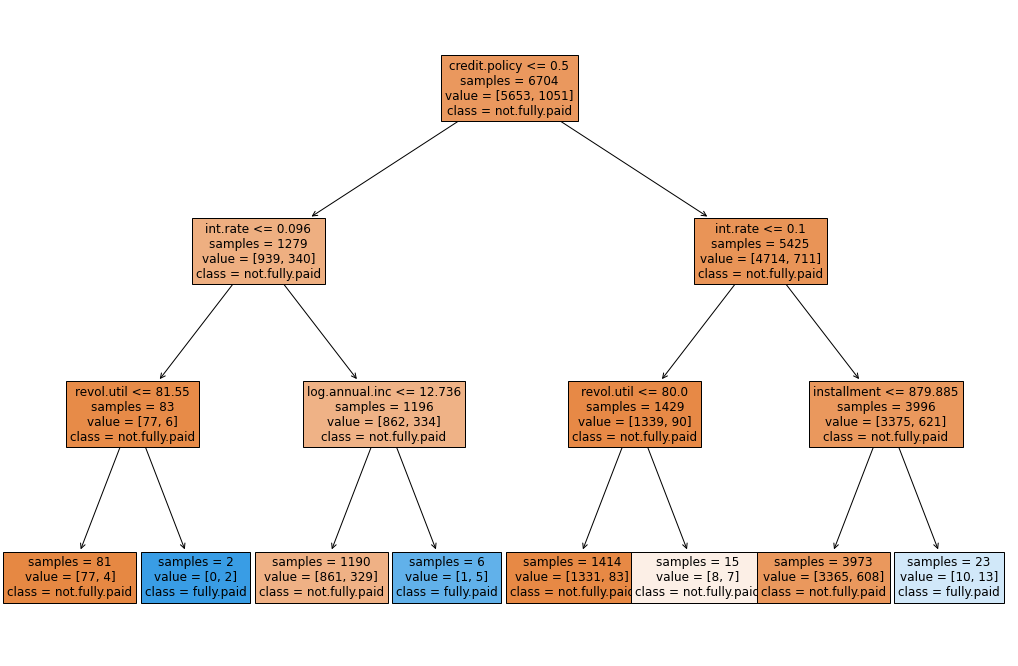

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,12))
a = plot_tree(dt_best, feature_names=X.columns, fontsize=12, filled=True,
              impurity= False,class_names=["not.fully.paid", "fully.paid"] )

## Ensemble learning

Ensemble simply means **combining multiple models**. Thus a collection of models is used to make predictions rather than an individual model.
The two main classes of ensemble learning methods are **bagging** and **boosting**.

*  **Bagging**– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

*  **Boosting**– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

<img src="https://i.postimg.cc/c4w9WR9d/ensemble.png" width="700"/>
<img src="https://i.postimg.cc/zBy7cKHZ/soft-vs-hard-voting.png" width="700"/>

### Why does this work?
* Different models may be good at `different parts` of data (even if they underfit)
* Individual mistakes can be 'averaged out' (especially if models overfit)

### Which models should be combined?
* Bias-variance analysis teaches us that we have two options:
    * If model underfits (high bias, low variance): combine with other low-variance models
        * Need to be different: 'experts' on different parts of the data
        * Bias reduction. Can be done with **_Boosting_**
    * If model overfits (low bias, high variance): combine with other low-bias models
        * Need to be different: individual mistakes must be different
        * `Variance reduction`. Can be done with **_Bagging_**
* Models must be uncorrelated but good enough (otherwise the ensemble is worse)


## Bagging (Bootstrap Aggregating)

* Obtain different models by **training the _same_ model on _different training samples_**
    * Reduce overfitting by averaging out individual predictions (variance reduction)
* In practice: take $I$ bootstrap samples of your data, train a model on each bootstrap
   * Higher $I$: more models, more smoothing (but slower training and prediction)    
* Base models should be unstable: different training samples yield different models
    * E.g. very deep decision trees, or even randomized decision trees 
    * Deep Neural Networks can also benefit from bagging (deep ensembles)
* Prediction by averaging predictions of base models
    * Soft voting for classification (possibly weighted)
    * Mean value for regression
* Can produce uncertainty estimates as well
    * By combining class probabilities of individual models (or variances for regression) 
    
<img src="https://i.postimg.cc/SKCN7tVw/Bagging-Bootstrap-Aggregation.gif" />


### In practice

* Different implementations can be used. E.g. in scikit-learn:
    * `BaggingClassifier`: Choose your own base model and sampling procedure
    * `RandomForestClassifier`: Default implementation, many options

* Most important parameters:
    * `n_estimators` (>100, higher is better, but diminishing returns)
        * Will start to underfit (bias error component increases slightly)
    * `max_features`
        * Defaults: $sqrt(p)$ for classification, $log2(p)$ for regression
        * Set smaller to reduce space/time requirements
    * parameters of trees, e.g. `max_depth`, `min_samples_split`,...
        * Prepruning useful to reduce model size, but don't overdo it

* Easy to parallelize (set `n_jobs` to -1)
* Fix `random_state` (bootstrap samples) for reproducibility 

# 💥 Let’s compare

**DecisionTreeClassifier() score:**

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
scores.mean()

0.7423919552127505

**BaggingClassifier() score:**

In [107]:
from sklearn.ensemble import BaggingClassifier

estimator_bagging = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                     n_estimators=100, random_state=0)

scores = cross_val_score(estimator_bagging, X_train, y_train, cv=5)
scores.mean()

0.8392003071888878

* **base_estimator** - This represents the algorithm used as the base/weak learners. We will use the DecisionTreeClassifier algorithm as our weak/base learners.

* **n_estimators** - This represents the number of weak learners used. We will use 100 decision trees to build the bagging model.


* **random_state** - Allows us to reproduce the same dataset samples.

>### We can also use it to predict:

In [108]:
estimator_bagging.fit(X_train, y_train)
y_pred = estimator_bagging.predict(X_test)
test_accuracy = accuracy_score(y_pred,y_test)
print(f'accuracy of the test set is {test_accuracy:.2f}')

print(classification_report(y_test,y_pred))

accuracy of the test set is 0.83
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2392
           1       0.40      0.04      0.06       482

    accuracy                           0.83      2874
   macro avg       0.62      0.51      0.49      2874
weighted avg       0.76      0.83      0.76      2874



**RandomForestClassifier() score:**

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
scores = cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=5)
scores.mean()

0.8406921767003906

## Random Forests
* Uses randomized trees to make models even less correlated (more unstable)
* At every split( **not every tree!!!**), only consider max_features features, randomly selected


<img src="https://i.postimg.cc/SNPS0pvB/Random-Forest.gif" width="800" />

>**❗ NOTE:** Increasing the number of models (trees) decreases variance (less overfitting)


## 6. Training the Random Forest model

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)

In [111]:
rfc.fit(X_train,y_train) 
rfc_predictions=rfc.predict(X_test) 

In [112]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.90      2392
           1       0.34      0.04      0.06       482

    accuracy                           0.83      2874
   macro avg       0.59      0.51      0.48      2874
weighted avg       0.75      0.83      0.76      2874



In [113]:
px.imshow(confusion_matrix(y_test,rfc_predictions), text_auto=True)

* When we compare the results from both of the models we use, Random Forest model performs better than Decision Tree Model

* However, when it comes to the resuts for target column=1 of recall and f1 score, Decision Tree Model performs far better than the other one

* Therefore, before choosing an algorithm we have to keep in mind our priorities and pros and cons of different ML models

In [114]:
print(accuracy_score(rfc_predictions, y_test))

0.826722338204593


## hyperparameter tuning using cross validation

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
accuracy_test = accuracy_score(rfc_predictions, y_test)*100
print('The accuracy on test set is '+str(accuracy_test))

The accuracy on test set is 82.6722338204593


### finding right value for n_estimators

In [117]:
param_range = [5, 10, 50, 100, 200,300]
scores = []
for param in param_range:
    dt = RandomForestClassifier(n_estimators=param)
    score = cross_val_score(dt, X_train, y_train, scoring="accuracy", cv=5)
    scores.append(np.mean(score))


In [118]:
px.line(x=param_range, y=scores)

## Boosting

The idea is to fit models iteratively such that the training of model at a given step depends on the models fitted at the previous steps.

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, **each model tries to compensate for the weaknesses of its predecessor.** With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule.  For example, ADA BOOST, XG BOOST



<img src="https://i.postimg.cc/5yHrLDSz/Boosting.png" width="600"/>

## ADA BOOST

<img src="https://i.postimg.cc/KjLdCd32/ada.jpg" width="600"/>

Random Forest and AdaBoost are two popular machine learning algorithms. 

Both algorithms can be used for <span style="color:red">classification</span> and <span style="color:red">regression</span> tasks.

Both Random Forest and AdaBoost algorithm is based on the creation of a Forest of trees. 

* **Random Forest** is an ensemble learning algorithm that is created using a bunch of decision trees that make use of different variables or features and makes use of bagging techniques for data samples.

* **AdaBoost** is also an ensemble learning algorithm that is created using a bunch of what is called a decision stump. Decision stumps are nothing but decision trees with one node and two leaves.

<img src="https://i.postimg.cc/9QXnB4bV/trees.png" width="600"/>

The AdaBoost algorithm can be said to make decisions using a bunch of decision stumps.

**The tree is then tweaked iteratively to focus on areas where it predicts incorrectly.**

As a result, AdaBoost typically provides more accurate predictions than Random Forest. However, AdaBoost is also more sensitive to over-fitting than Random Forest. Here are different posts on Random forest and AdaBoost.

<img src="https://i.postimg.cc/Ghd7cBZY/vote.png" width="600"/>



In [52]:
from sklearn.ensemble import AdaBoostClassifier


#### Our AdaBoost Classifier

In [53]:
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(X_train, y_train)
clf_ada.score(X_test, y_test)

0.8305497564370216

In [54]:
AdaBoost_predictions = clf_ada.predict(X_test)
print(classification_report(y_test,AdaBoost_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2392
           1       0.45      0.05      0.09       482

    accuracy                           0.83      2874
   macro avg       0.65      0.52      0.50      2874
weighted avg       0.77      0.83      0.77      2874



## XGBoost
 `XGBoost`  is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed.

<img src="https://i.postimg.cc/d348Q0ym/evolution.png" width="600"/>



<img src="https://i.postimg.cc/nrcDWtPs/comparison.jpg" width="600"/>




Will review in the advanced course:)

if you want to know more
https://www.nvidia.com/en-us/glossary/data-science/xgboost

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

https://www.youtube.com/watch?v=OtD8wVaFm6E